In [19]:
#IMPORT IMP Library for data manipulation and data rendering 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [20]:

#Define filepath
filepath = os.getcwd()

#Function for reading file from your current directory
def read_csv(filepath,filename):

    #Read file from your path
    df = pd.read_csv(filename)
    return df

#Give filepath and file name to read.(in my case it is 'train.csv')
df = read_csv(filepath,'train.csv')

In [3]:
#View head of data
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [35]:
df.drop(columns=['id'],inplace=True)

In [16]:
#Describe how the dataset is looking
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [18]:
#If any null values present
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [24]:
#Define function to convert column datatype
def convert_age(df, columnname):
    
    #Define variable how they should work
    df[columnname] = df[columnname].astype('int32')
    return df

#Save datatype in dataframe
df = convert_age(df,'Age')

In [36]:
#Make two empty list for numeric and object data
#save numeric data into num empty list
num= []
cat = []

#iterate through dataset and save different dtypes in different list
for col in df.columns:

    #take help of api to save numeric data into an empty list
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
    else:
        cat.append(col)

#Print empty list
print(num)
print(cat)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


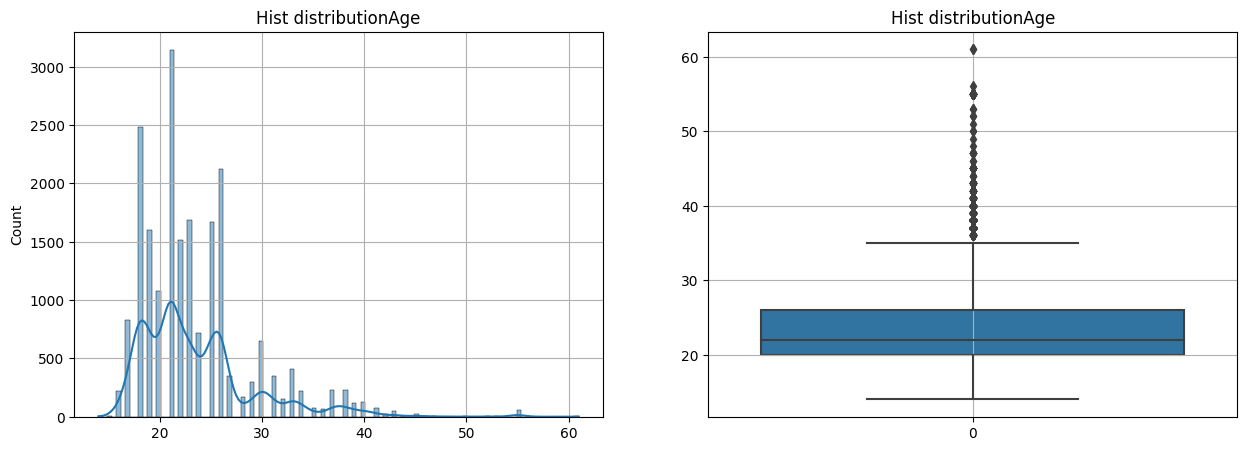

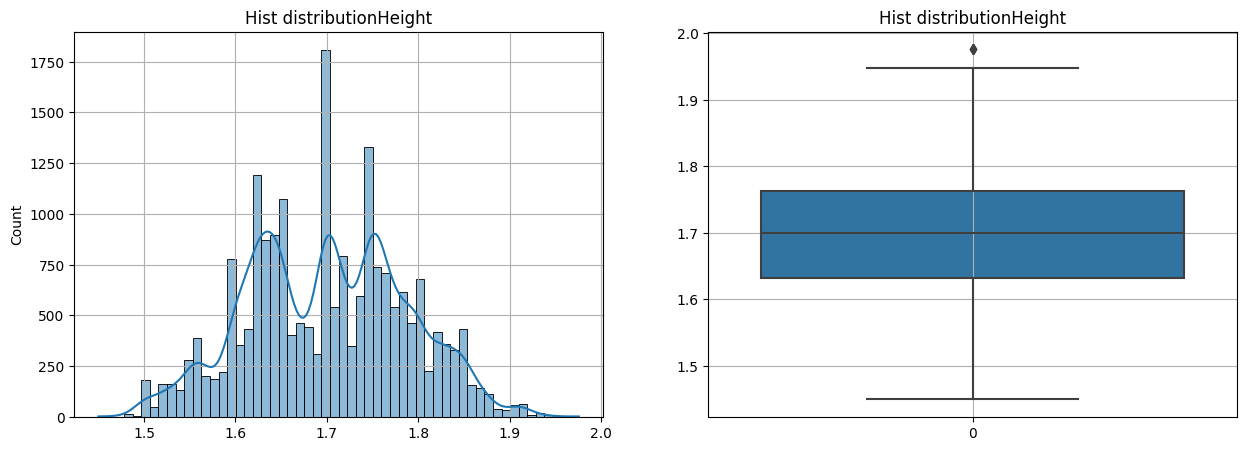

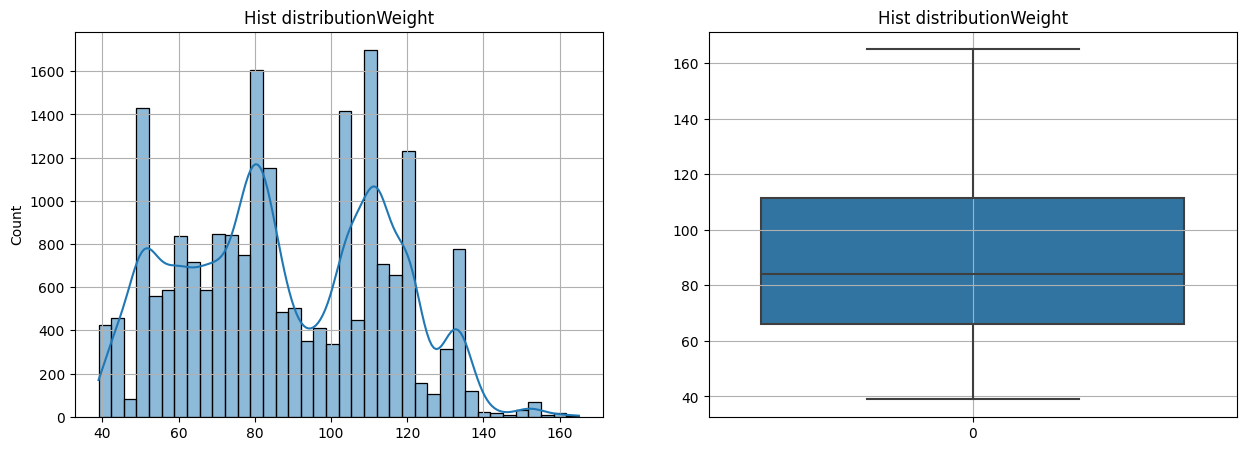

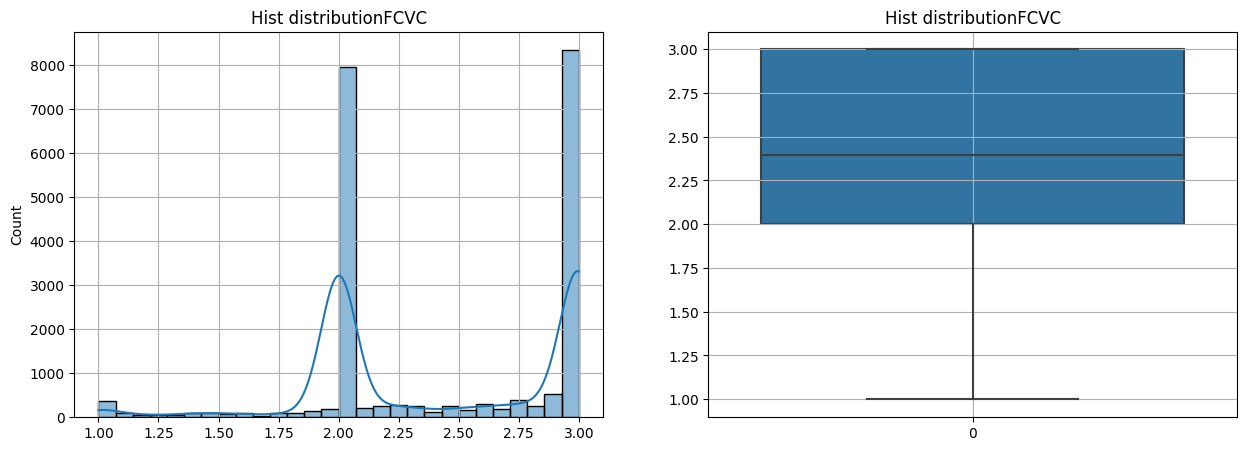

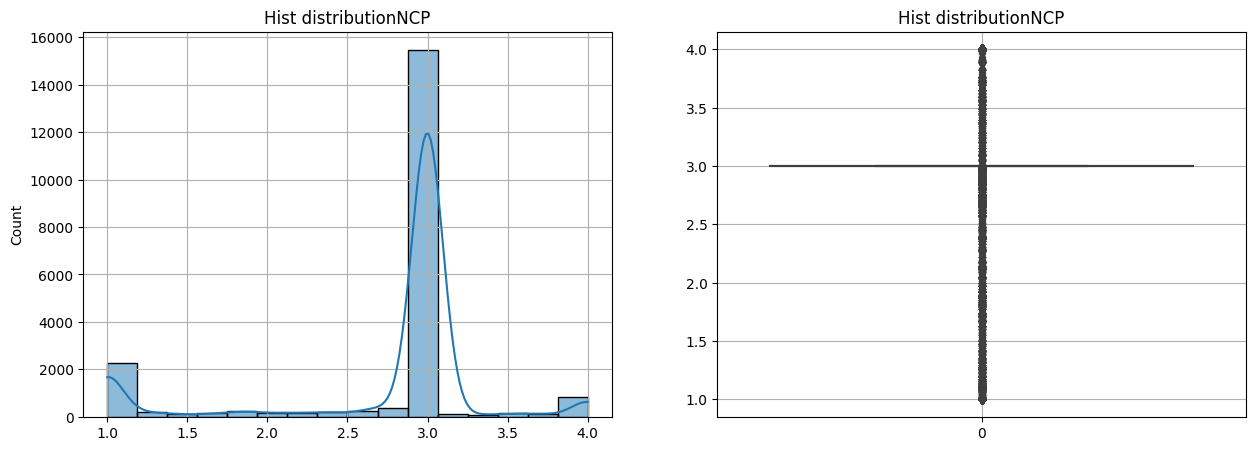

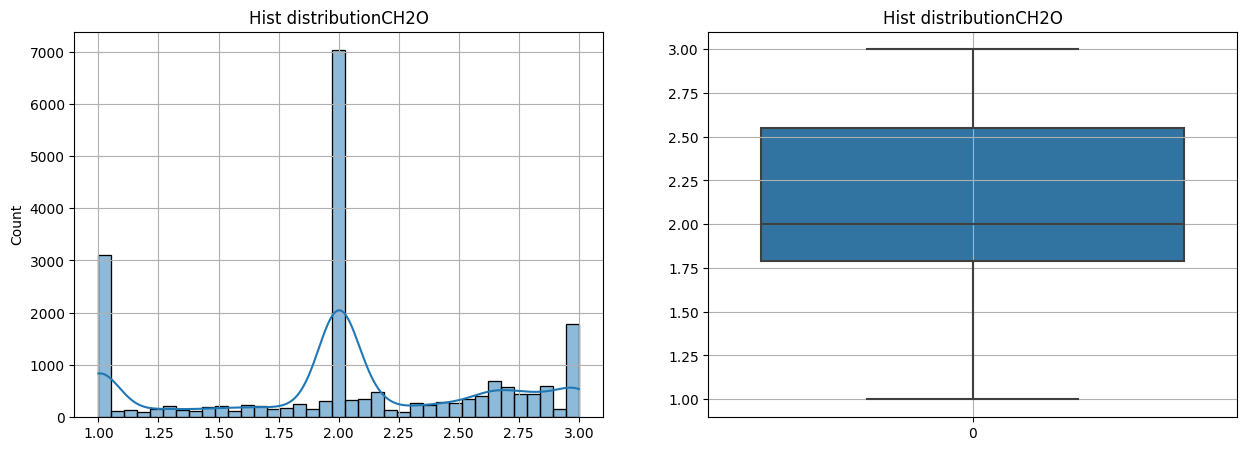

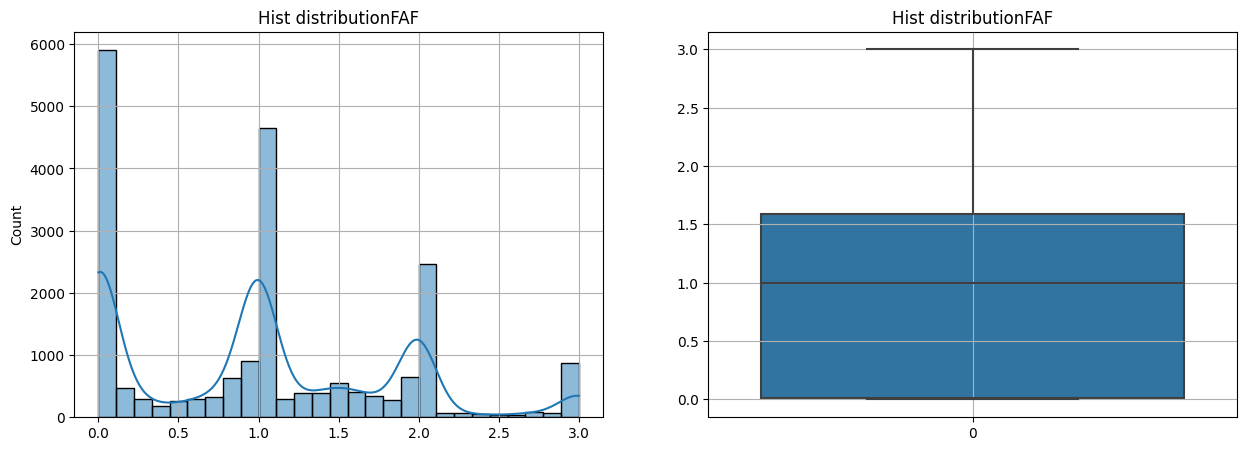

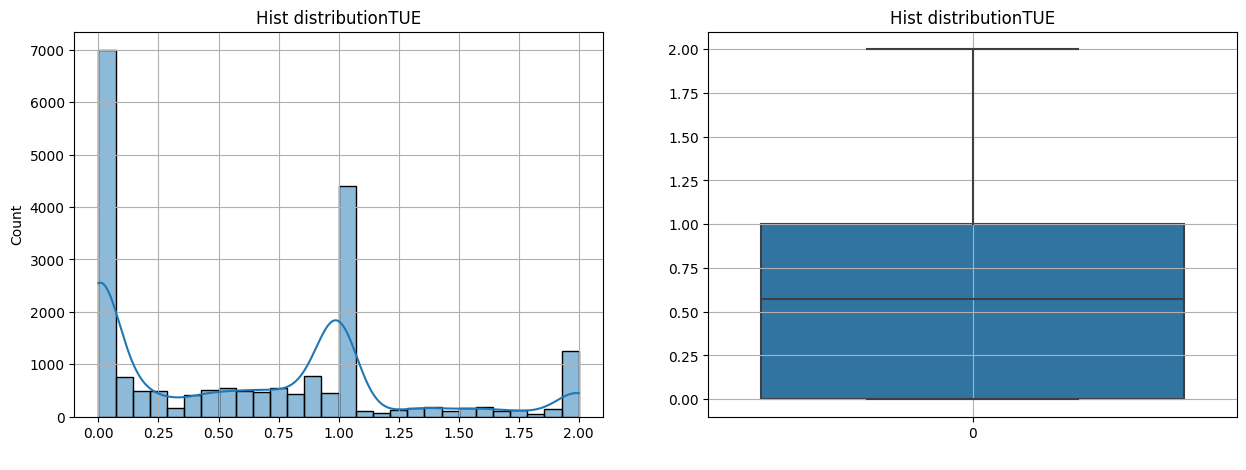

In [43]:

#Multiple plot of numeric columns and 

for i in num:

    #Iterate through all the data values 
    figure,axes = plt.subplots(1,2,figsize=(15,5))
    sns.histplot(df[i],ax=axes[0],kde=True)
    axes[0].set_title(f"Hist distribution{i}")
    axes[0].grid(True)
    axes[0].set_xlabel(" ")

    #box plot
    sns.boxplot(df[i],ax=axes[1])
    axes[1].set_title(f"Hist distribution{i}")
    axes[1].grid(True)
    axes[1].set_xlabel(" ")

    

### We can see that there are some areas where we are having **outliers** 

<Figure size 2000x600 with 0 Axes>

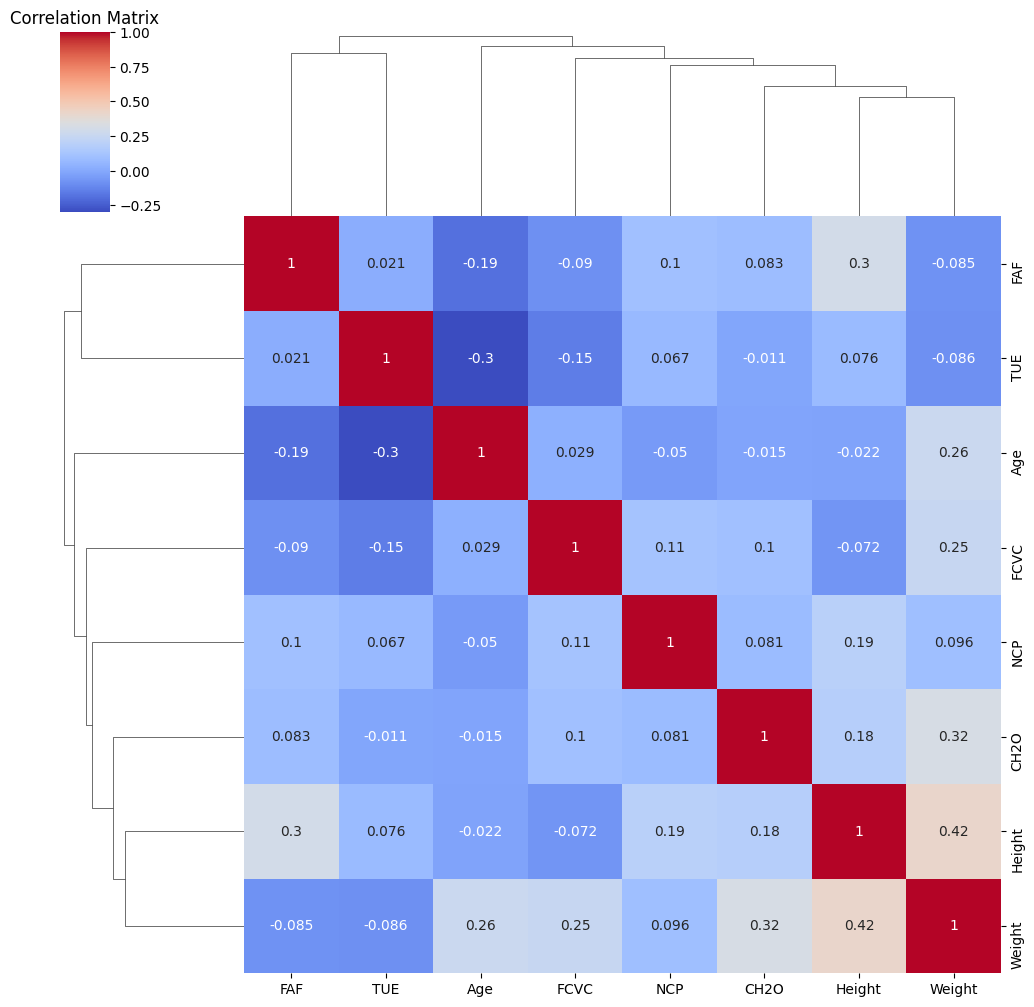

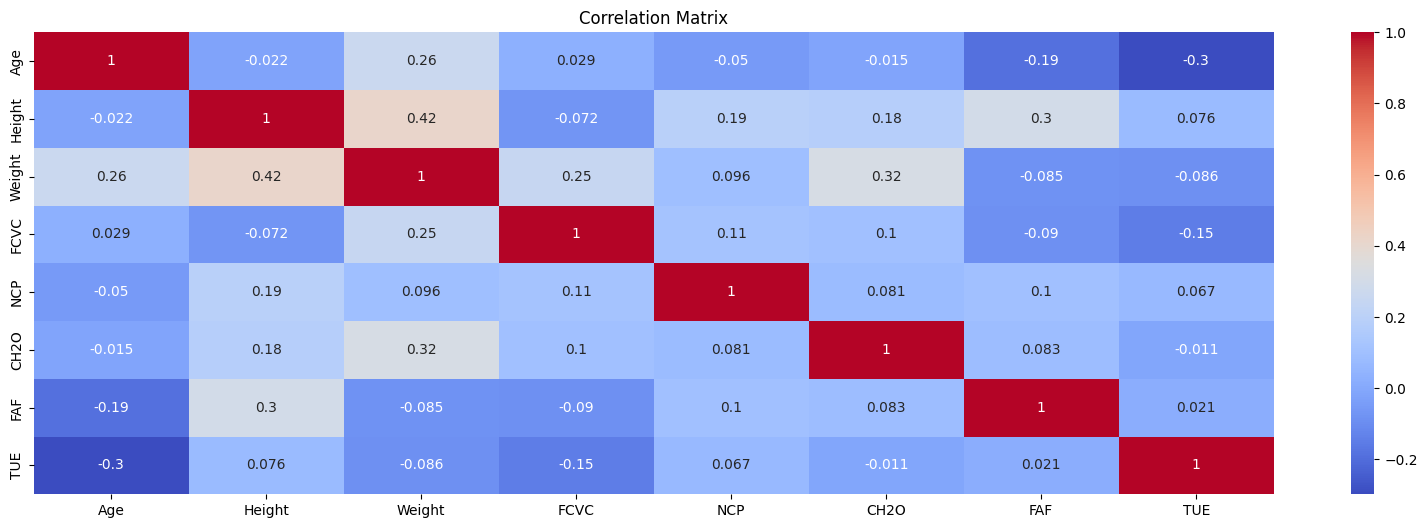

In [48]:
corr = df.select_dtypes(include=['int','float']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 6))
sns.clustermap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()